# Filters

## Introduction
Filters are essential tools in signal processing, enabling us to manipulate specific frequency components of a signal. They can be used to amplify or attenuate certain frequencies, making them crucial in applications like noise reduction, audio processing, and communication systems. 

The **Fourier Transform** plays a pivotal role in the design and analysis of filters by representing signals in the frequency domain. This perspective allows us to see how a filter affects the different frequency components of a signal.

### Key Concept: Transfer Function
A filter's behavior is characterized by its **transfer function** $ H(f) $, which is a complex function defining how each frequency component of an input signal is modified. For a given input signal $ x(t) $, the output signal $ y(t) $ can be obtained by taking the inverse Fourier Transform of the product of $ X(f) $ and $ H(f) $:

$$
Y(f) = H(f) \cdot X(f)
$$

where:
- $ X(f) = \mathcal{F} \{ x(t) \} $ is the Fourier Transform of the input signal.
- $ H(f) $ is the filter’s transfer function.
- $ Y(f) = \mathcal{F} \{ y(t) \} $ is the Fourier Transform of the output signal.

### Types of Filters
Filters are generally categorized based on their frequency responses:

- **Low-Pass Filter**: Allows frequencies below a certain cutoff frequency to pass and attenuates higher frequencies.
- **High-Pass Filter**: Allows frequencies above a certain cutoff frequency to pass and attenuates lower frequencies.
- **Band-Pass Filter**: Allows frequencies within a specific range to pass and attenuates frequencies outside this range.
- **Band-Stop Filter**: Attenuates frequencies within a specific range and allows frequencies outside this range to pass.

### Theoretical Example: Low-Pass Filter
Consider a simple **ideal low-pass filter** defined by its transfer function:

$$
H(f) = 
\begin{cases}
1, & |f| \leq f_c \\
0, & |f| > f_c
\end{cases}
$$

where:
- $ f_c $ is the cutoff frequency.

If we have an input signal $ x(t) = \text{sinc}(2 f_c t) $, its Fourier Transform is given by:

$$
X(f) = 
\begin{cases}
1, & |f| \leq f_c \\
0, & |f| > f_c
\end{cases}
$$

Applying the low-pass filter $ H(f) $, the output in the frequency domain is:

$$
Y(f) = H(f) \cdot X(f) = 
\begin{cases}
1, & |f| \leq f_c \\
0, & |f| > f_c
\end{cases}
$$

Taking the inverse Fourier Transform, the output in the time domain is:

$$
y(t) = \text{sinc}(2 f_c t)
$$

This example shows that when we pass a sinc function through an ideal low-pass filter with a cutoff frequency $ f_c $, the output remains unchanged because the sinc function's frequency components are already within the filter's passband.

### Magnitude and Phase Response
The **magnitude response** $ |H(f)| $ and **phase response** $ \angle H(f) $ of a filter determine how it affects the amplitude and phase of each frequency component. For the ideal low-pass filter:

- **Magnitude Response**:

  $$ |H(f)| = 
  \begin{cases}
  1, & |f| \leq f_c \\
  0, & |f| > f_c
  \end{cases}
  $$

- **Phase Response**:

  $$ \angle H(f) = 0 $$

This indicates that the filter does not alter the phase of the components within the passband.


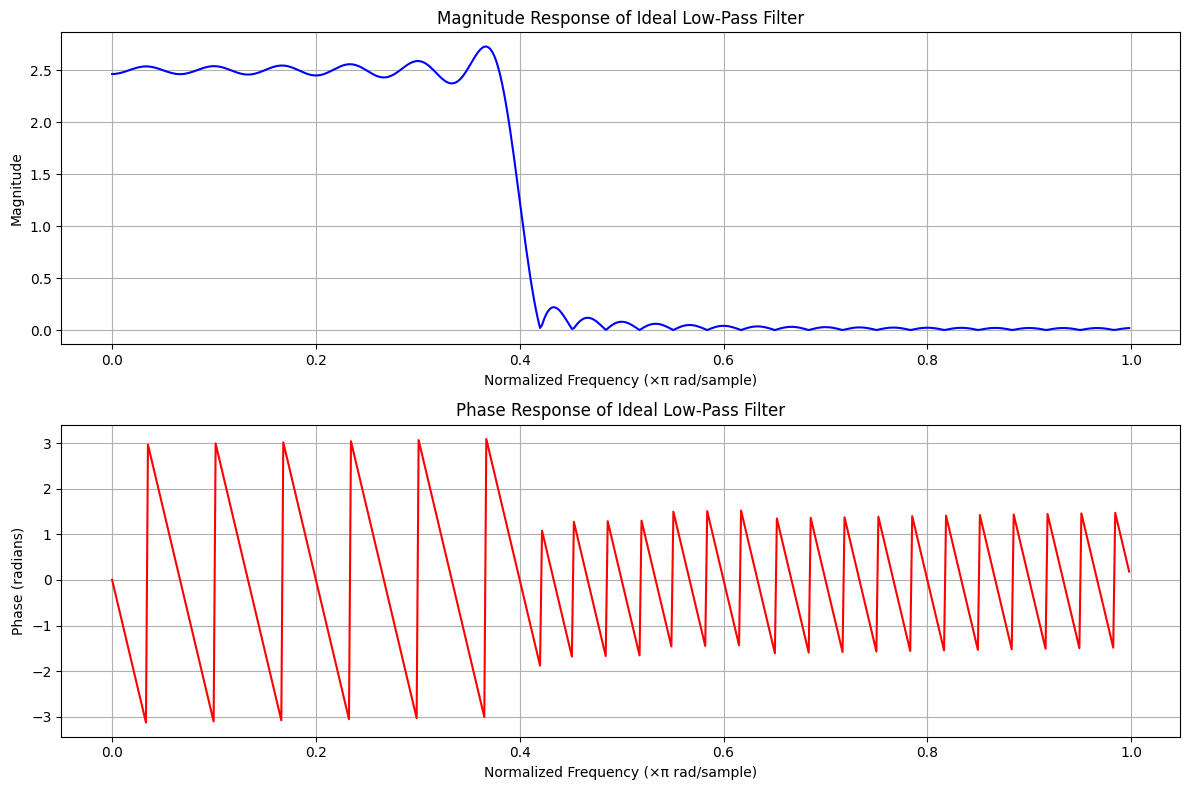

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Define filter parameters
cutoff_freq = 0.2  # Cutoff frequency as a fraction of the Nyquist frequency
b = np.sinc(2 * cutoff_freq * (np.arange(-30, 31)))  # Impulse response of the ideal low-pass filter

# Compute frequency response
w, h = freqz(b)

# Magnitude and Phase Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Magnitude Response
ax1.plot(w / np.pi, np.abs(h), 'b')
ax1.set_title('Magnitude Response of Ideal Low-Pass Filter')
ax1.set_xlabel('Normalized Frequency (×π rad/sample)')
ax1.set_ylabel('Magnitude')
ax1.grid()

# Phase Response
ax2.plot(w / np.pi, np.angle(h), 'r')
ax2.set_title('Phase Response of Ideal Low-Pass Filter')
ax2.set_xlabel('Normalized Frequency (×π rad/sample)')
ax2.set_ylabel('Phase (radians)')
ax2.grid()

plt.tight_layout()
plt.show()


## Butterworth Filter Theory

### Introduction
The **Butterworth filter** is one of the most widely used types of filters in signal processing. It was first described by physicist Stephen Butterworth in 1930 in his paper titled "On the Theory of Filter Amplifiers." The Butterworth filter is known for its **maximally flat frequency response** in the passband and a smooth transition to the stopband, which means it has no ripples in the passband or stopband.

#### Key Characteristics
- **Maximally Flat Response**: The Butterworth filter is designed to have a frequency response that is as flat as possible in the passband, meaning it has no amplitude variations.
- **Smooth Roll-off**: The filter’s transition from passband to stopband is smooth and monotonic, making it useful in applications where phase linearity and minimal signal distortion are important.
- **Order of the Filter**: The order `n` of the Butterworth filter determines the steepness of the roll-off. A higher-order filter will have a sharper cutoff but may introduce more phase distortion.

#### Butterworth Transfer Function
The transfer function of an `n`th-order Butterworth filter is defined as:

$$
H(f) = \frac{1}{\sqrt{1 + \left( \frac{f}{f_c} \right)^{2n}}}
$$

where:
- $f_c$ is the cutoff frequency.
- $n$ is the order of the filter.
- $f$ is the frequency variable.

#### Frequency Response Analysis
The **magnitude response** of the Butterworth filter is defined as:

$$
|H(f)| = \frac{1}{\sqrt{1 + \left( \frac{f}{f_c} \right)^{2n}}}
$$

This equation shows that at $f = f_c$, the magnitude drops to $|H(f_c)| = \frac{1}{\sqrt{2}} \approx 0.707$. This is the characteristic -3 dB point, where the filter attenuates the signal by 3 decibels.

#### Example: Low-Pass Butterworth Filter
For a low-pass Butterworth filter, the frequency response remains flat until the cutoff frequency $f_c$ and then decreases smoothly to zero in the stopband. The **sharpness** of this transition depends on the filter order:

- **1st Order**: Gradual slope in the transition region.
- **2nd Order and Higher**: Sharper slope, offering better attenuation in the stopband.

Let's see a pythoh example for this filter


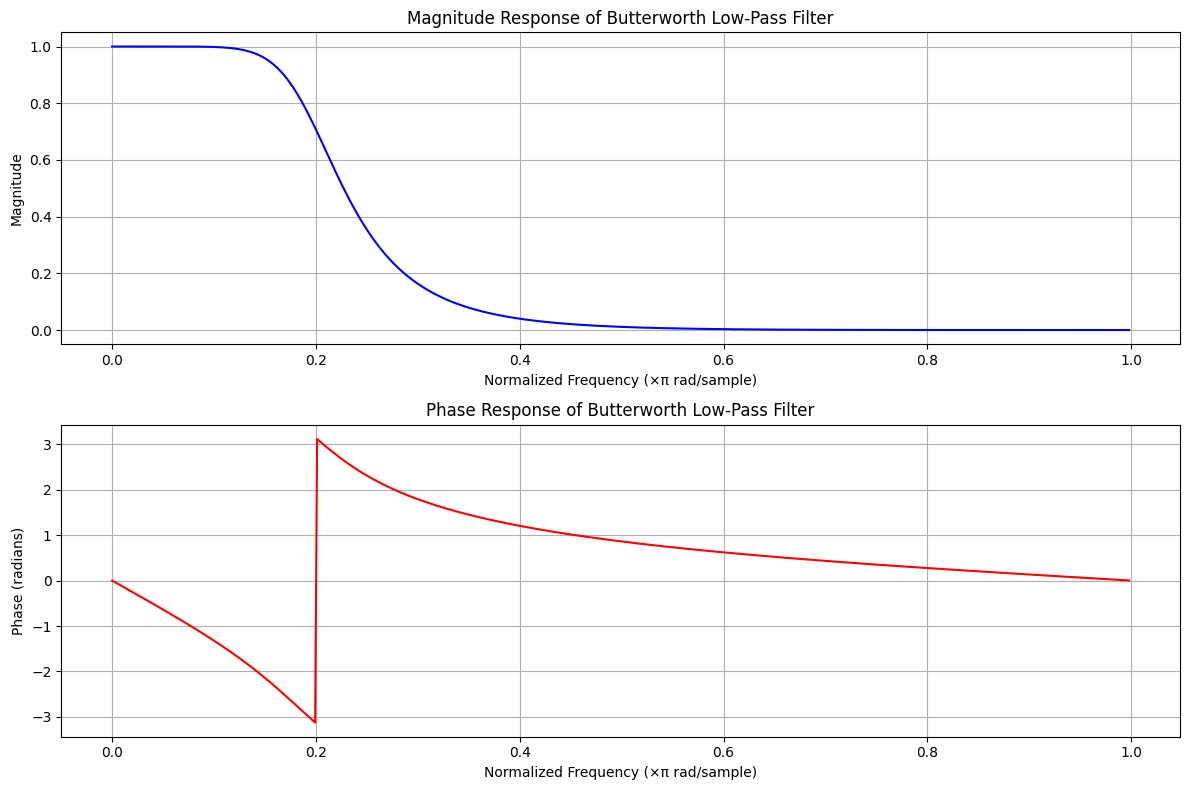

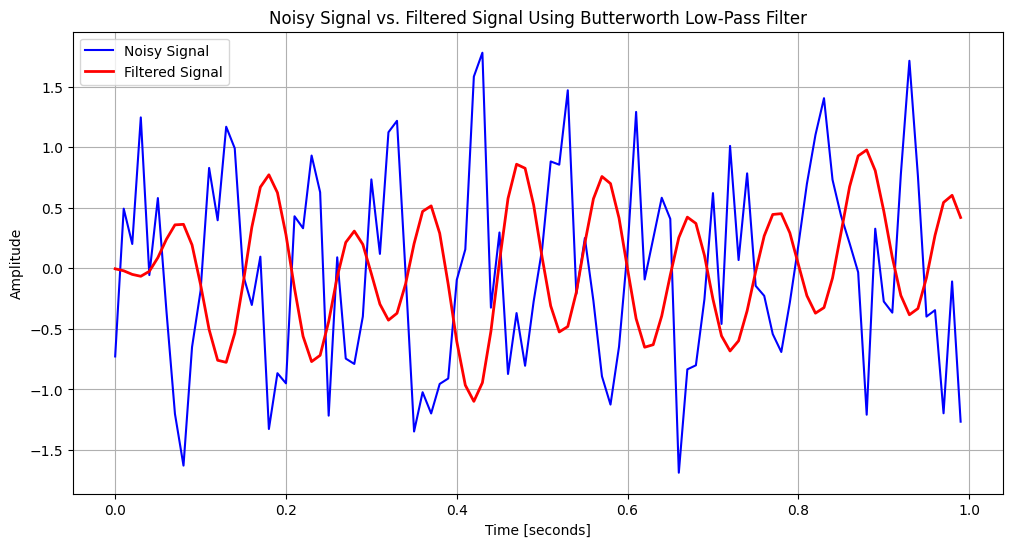

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, lfilter

# Define parameters for the Butterworth filter
order = 4         # Filter order
cutoff = 0.2      # Cutoff frequency as a fraction of the Nyquist frequency

# Design Butterworth low-pass filter
b, a = butter(order, cutoff, btype='low', analog=False)

# Compute frequency response
w, h = freqz(b, a)

# Plot magnitude and phase response
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Magnitude response
ax1.plot(w / np.pi, np.abs(h), 'b')
ax1.set_title('Magnitude Response of Butterworth Low-Pass Filter')
ax1.set_xlabel('Normalized Frequency (×π rad/sample)')
ax1.set_ylabel('Magnitude')
ax1.grid()

# Phase response
ax2.plot(w / np.pi, np.angle(h), 'r')
ax2.set_title('Phase Response of Butterworth Low-Pass Filter')
ax2.set_xlabel('Normalized Frequency (×π rad/sample)')
ax2.set_ylabel('Phase (radians)')
ax2.grid()

plt.tight_layout()
plt.show()

# Apply the filter to a sample signal (sine wave with noise)
# Generate a sample noisy signal
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.normal(size=t.shape)

# Apply Butterworth filter
y = lfilter(b, a, x)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b-', label='Noisy Signal')
plt.plot(t, y, 'r-', linewidth=2, label='Filtered Signal')
plt.title('Noisy Signal vs. Filtered Signal Using Butterworth Low-Pass Filter')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

### Power Spectrum Theorem
The **power spectrum theorem** states that the power of a signal in the time domain is equal to the power in the frequency domain:

```{prf:theorem}
:label: power-spectrum-theorem

If $ x(t) $ is a signal with Fourier Transform $ X(f) $, then its total power is given by:

$$
P = \int_{-\infty}^{\infty} |x(t)|^2 \, dt = \int_{-\infty}^{\infty} |X(f)|^2 \, df
$$

This theorem is a powerful result in signal processing, as it provides a relationship between the time-domain power and the frequency-domain power of a signal.
```

We can see an example below which shows the power theorem in action for the signal both in the time and frequency domain which results in the same power.

Time Domain Power: 296.96
Frequency Domain Power: 296.96


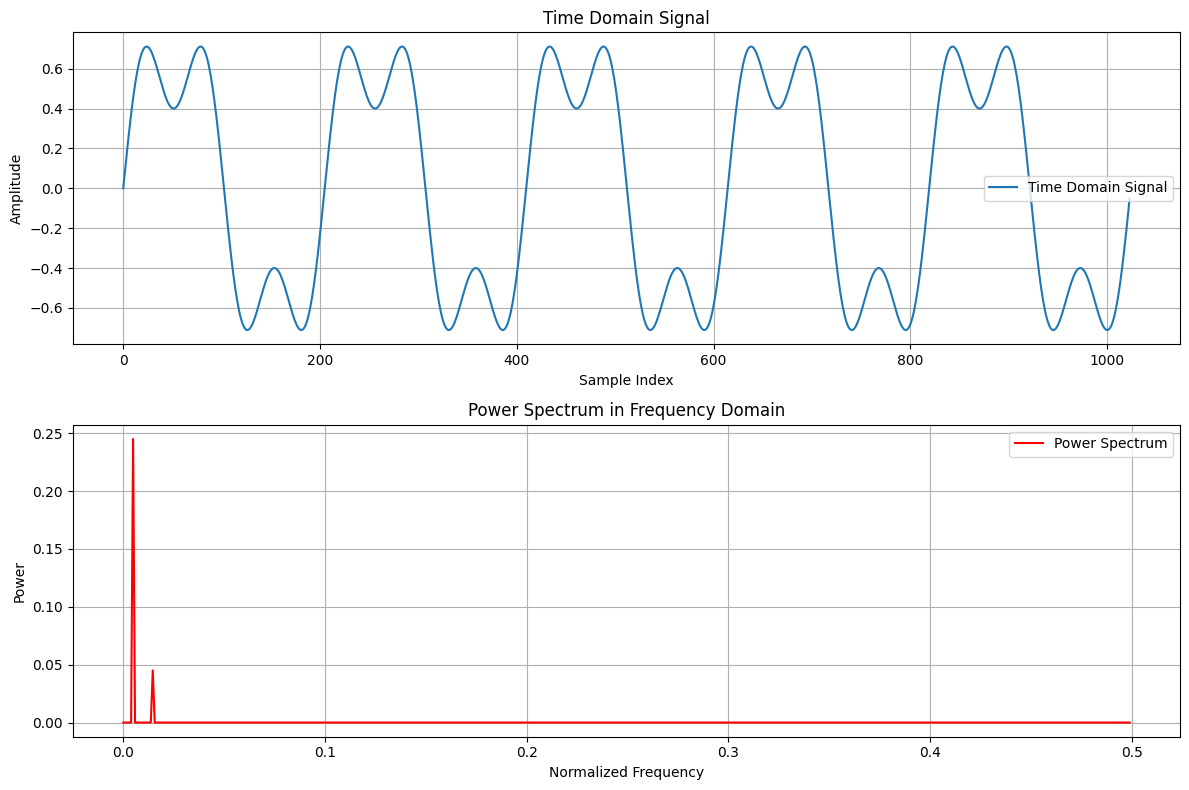

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a discrete-time signal (a combination of sine waves)
N = 1024  # Number of samples
n = np.arange(N)
x = 0.7 * np.sin(2 * np.pi * 5 * n / N) + 0.3 * np.sin(2 * np.pi * 15 * n / N)  # Signal with 2 frequency components

# Compute power in the time domain
time_domain_power = np.sum(np.abs(x)**2)

# Compute the Discrete Fourier Transform (DFT)
X = np.fft.fft(x)
X_mag = np.abs(X) / N  # Normalize the amplitude

# Compute power in the frequency domain
frequency_domain_power = np.sum(np.abs(X)**2) / N

# Print the results
print(f"Time Domain Power: {time_domain_power:.2f}")
print(f"Frequency Domain Power: {frequency_domain_power:.2f}")

# Verify that the power in both domains is equal
assert np.isclose(time_domain_power, frequency_domain_power), "Power theorem verification failed!"

# Plot the signal and its power spectrum
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot time-domain signal
ax1.plot(n, x, label='Time Domain Signal')
ax1.set_title('Time Domain Signal')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.grid()
ax1.legend()

# Plot power spectrum
frequencies = np.fft.fftfreq(N)
ax2.plot(frequencies[:N // 2], 2 * X_mag[:N // 2]**2, label='Power Spectrum', color='r')
ax2.set_title('Power Spectrum in Frequency Domain')
ax2.set_xlabel('Normalized Frequency')
ax2.set_ylabel('Power')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()